In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv('data/ready_to_model.csv')
print(df.shape)
print(df.head())

# clean out missing values
df = df.dropna()
print(df.shape)
print(df.head())

(45, 31)
      target     vec_1     vec_2     vec_3     vec_4     vec_5     vec_6  \
0   transact -0.018570 -0.031737 -0.027723 -0.001139  0.062968 -0.024740   
1  transform  0.013204  0.009428  0.038983  0.026551  0.005384 -0.017340   
2        NaN  0.050395  0.050009  0.082112  0.032920  0.009977 -0.075748   
3        NaN -0.010274  0.039289  0.027041  0.049897  0.047786 -0.071761   
4        NaN  0.049971  0.000303  0.084578 -0.005040  0.029496 -0.008910   

      vec_7     vec_8     vec_9  ...    vec_21    vec_22    vec_23    vec_24  \
0 -0.007947 -0.084030  0.075126  ... -0.010854 -0.026031 -0.015426 -0.006903   
1  0.037598 -0.113060  0.114380  ...  0.063993 -0.021484 -0.005044  0.012037   
2  0.021710 -0.002667  0.027541  ...  0.136900  0.031383 -0.059847  0.075300   
3  0.035830 -0.112740  0.079033  ...  0.133660  0.004097 -0.026222  0.045565   
4  0.006110 -0.077228  0.000346  ...  0.058427  0.046803 -0.073409  0.046769   

     vec_25    vec_26    vec_27    vec_28    vec_29  

In [7]:
y = df.target
X = df.iloc[:,1:]
print y.shape
print X.shape

(24,)
(24, 30)


In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [26]:
# Define and fit the model
estimator =  LogisticRegression()
params = dict(C=np.logspace(0,4,20))
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=20, random_state=42)
clf_cv = GridSearchCV(estimator, param_grid=params, cv=cv, verbose=10, n_jobs=6, return_train_score=True, scoring='roc_auc')
print(clf_cv.fit(X, y))

Fitting 60 folds for each of 20 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0253s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 124 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 250 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 376 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 530 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 684 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 866 tasks      | elapsed:    1.4s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x7f29b65ea510>,
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'C': array([1.00000e+00, 1.62378e+00, 2.63665e+00, 4.28133e+00, 6.95193e+00,
       1.12884e+01, 1.83298e+01, 2.97635e+01, 4.83293e+01, 7.84760e+01,
       1.27427e+02, 2.06914e+02, 3.35982e+02, 5.45559e+02, 8.85867e+02,
       1.43845e+03, 2.33572e+03, 3.79269e+03, 6.15848e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=10)


[Parallel(n_jobs=6)]: Done 1048 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed:    1.7s finished
/home/hudson/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


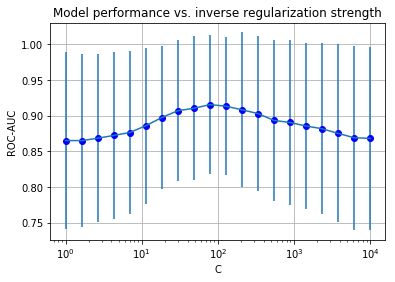

In [27]:
# raw cross-validation results
res = clf_cv.cv_results_
res

import matplotlib.pyplot as plt
plt.semilogx(params['C'], res['mean_test_score'], 'bo')
plt.errorbar(params['C'], res['mean_test_score'], yerr=res['std_test_score'])
plt.title('Model performance vs. inverse regularization strength')
plt.xlabel('C')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

In [30]:
# pull off the model with the best value of C
# but it's only trained on 2/3 of the data
best_model = clf_cv.best_estimator_

# refit to 1/1ths of the data. 
# use this model in your application
best_model.fit(X,y)

LogisticRegression(C=78.47599703514611, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)